<a href="https://colab.research.google.com/github/DavidBeinish/StockPredictionTSLA/blob/main/337937064_207233750_204116446_FinalDeepLearningAsssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries 

In [99]:
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional


#Loading Data & Data Analysis

In [75]:
### A df with all the TLSA stock values between the 30/06/2010 to the 21/06/2022
df = pd.read_csv("/content/TSLA_DeepLearning.csv")


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3015 entries, 0 to 3014
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3015 non-null   object 
 1   Open       3015 non-null   float64
 2   High       3015 non-null   float64
 3   Low        3015 non-null   float64
 4   Close      3015 non-null   float64
 5   Adj Close  3015 non-null   float64
 6   Volume     3015 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 165.0+ KB


In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,30/06/2010,5.158,6.084,4.660,4.766,4.766,85935500
1,01/07/2010,5.000,5.184,4.054,4.392,4.392,41094000
2,02/07/2010,4.600,4.620,3.742,3.840,3.840,25699000
3,06/07/2010,4.000,4.000,3.166,3.222,3.222,34334500
4,07/07/2010,3.280,3.326,2.996,3.160,3.160,34608500


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3015.000000,3015.000000,3015.000000,3015.000000,3015.000000,3.015000e+03
mean,153.082385,156.536072,149.321346,153.027561,153.027561,3.124209e+07
std,268.184920,274.467827,261.126391,267.901902,267.901902,2.770657e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,21.532001,22.565000,21.063000,21.829999,21.829999,1.343515e+07
50%,47.203999,48.000000,46.326000,47.360001,47.360001,2.513300e+07
75%,69.351002,70.305001,68.181000,69.349998,69.349998,3.958545e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08


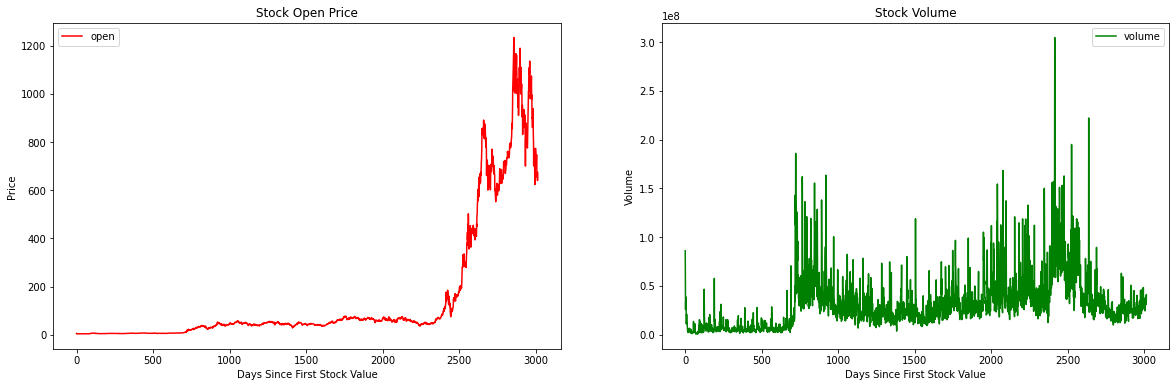

In [6]:
plt.figure(figsize=(20, 6));
plt.subplot(1,2,1);
plt.plot(df.Open.values, color='red', label='open')
plt.title('Stock Open Price')
plt.xlabel('Days Since First Stock Value')
plt.ylabel('Price')
plt.legend(loc='best')
#plt.show()

plt.subplot(1,2,2);
plt.plot(df.Volume.values, color='green', label='volume')
plt.title('Stock Volume')
plt.xlabel('Days Since First Stock Value')
plt.ylabel('Volume')
plt.legend(loc='best');

#Splitting into Train and Validation (Test)


In [5]:
df = df['Open'].values
df = df.reshape(-1, 1)

In [6]:
train = np.array(df[:int(df.shape[0]*0.9)])
validation = np.array(df[int(df.shape[0]*0.9):])

len(train), len(validation)

(2713, 302)

# Scaling

In [7]:
sc = MinMaxScaler(feature_range=(0,1))
train_scaled = sc.fit_transform(train)
validation_scaled = sc.transform(validation)

# Setting X and y

### For X, we append 50 open prices and y receives the next open price.





In [8]:
def create_dataset(df):
    X = []
    y = []
    for i in range(50, df.shape[0]):
        X.append(df[i-50:i, 0])
        y.append(df[i, 0])
    X = np.array(X)
    y = np.array(y)
    return X,y

In [9]:
X_train_Scaled, y_train_Scaled = create_dataset(train_scaled)
X_test_Scaled, y_test_Scaled = create_dataset(validation_scaled)

### Reshaping

In [10]:
X_train_Scaled = np.reshape(X_train_Scaled, (X_train_Scaled.shape[0], X_train_Scaled.shape[1], 1))
X_test_Scaled = np.reshape(X_test_Scaled, (X_test_Scaled.shape[0], X_test_Scaled.shape[1], 1))

# Building LSTM Model

In [11]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(X_train_Scaled.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [12]:
X_train_Scaled = np.reshape(X_train_Scaled , (X_train_Scaled.shape[0], X_train_Scaled.shape[1], 1))
X_test_Scaled = np.reshape(X_test_Scaled, (X_test_Scaled.shape[0], X_test_Scaled.shape[1], 1))

In [13]:
model.compile(optimizer='adam',loss='mean_squared_error' )

In [14]:
###callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7)
history = model.fit(X_train_Scaled, y_train_Scaled, epochs=50, batch_size=32)
history



Epoch 1/50
84/84 [==============================] - 24s 207ms/step - loss: 0.0023
Epoch 2/50
84/84 [==============================] - 13s 158ms/step - loss: 0.0015
Epoch 3/50
84/84 [==============================] - 13s 158ms/step - loss: 9.4029e-04
Epoch 4/50
84/84 [==============================] - 13s 159ms/step - loss: 7.4663e-04
Epoch 5/50
84/84 [==============================] - 14s 169ms/step - loss: 6.9282e-04
Epoch 6/50
84/84 [==============================] - 14s 169ms/step - loss: 6.4882e-04
Epoch 7/50
84/84 [==============================] - 13s 158ms/step - loss: 8.2155e-04
Epoch 8/50
84/84 [==============================] - 13s 159ms/step - loss: 6.0339e-04
Epoch 9/50
84/84 [==============================] - 13s 160ms/step - loss: 5.6025e-04
Epoch 10/50
84/84 [==============================] - 13s 159ms/step - loss: 6.3963e-04
Epoch 11/50
84/84 [==============================] - 13s 159ms/step - loss: 7.1482e-04
Epoch 12/50
84/84 [==============================] - 14s 171

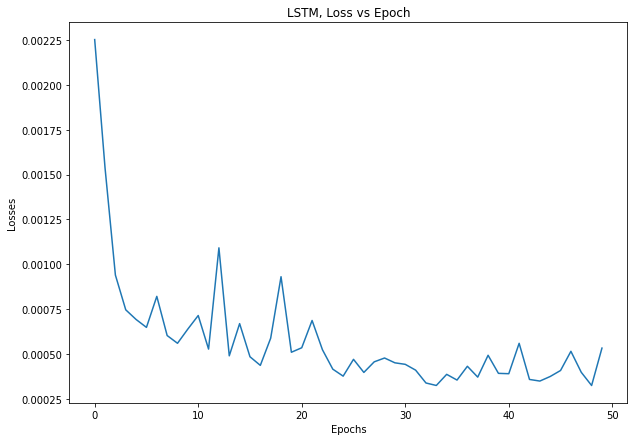

In [107]:
plt.figure(figsize =(10,7));
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM, Loss vs Epoch")
plt.show()



In [74]:
model.save('TSLA_prediction_Train')
model = load_model('TSLA_prediction_Train')

# Test Vizualisation & Results

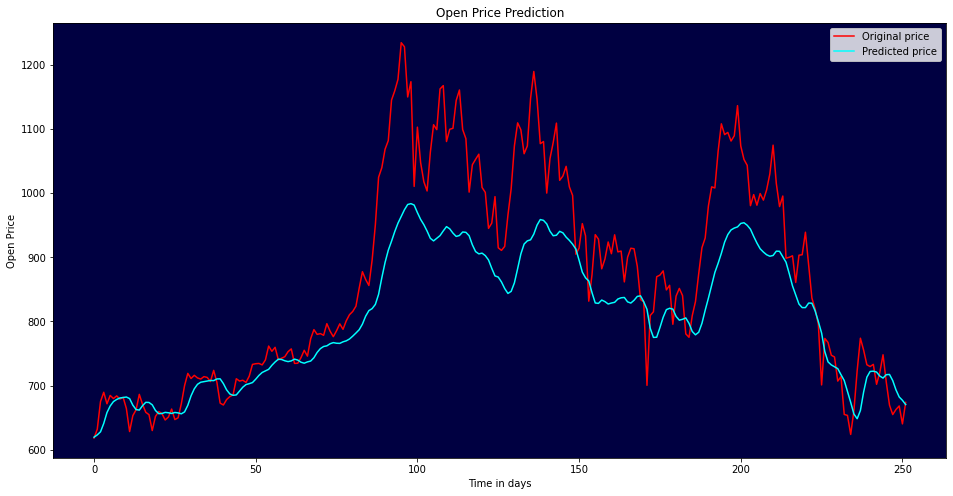

In [86]:
predictions = model.predict(X_test_Scaled)
predictions = sc.inverse_transform(predictions)
y_test_Unscaled = sc.inverse_transform(y_test_Scaled.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_Unscaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.xlabel("Time in days")
plt.ylabel("Open Price")
plt.title("Open Price Prediction")
plt.legend()

In [87]:
results = pd.DataFrame(y_test_Unscaled, columns = ['True'])
results['Predictions'] = pd.DataFrame(predictions, columns = ['Predictions'])

results.tail(100)

,True,Predictions
152,933.359985,867.972412
153,831.559998,862.963074
154,872.710022,844.820374
155,935.210022,828.754639
156,928.179993,828.085205
...,...,...
247,654.859985,707.797546
248,662.750000,693.355896
249,668.210022,682.235901
250,640.299988,677.064087


In [17]:
from sklearn import metrics
def evaluate(true, predicted):
    
    mse = metrics.mean_squared_error(true, predicted)
    return  mse

In [88]:
# Test MSE
evaluate(y_test_Unscaled,predictions)

8975.019010798498

#Building the GRU Model

In [101]:
# The GRU architecture
modelGRU = Sequential()
# First GRU layer with Dropout regularisation
modelGRU.add(GRU(units=96, return_sequences=True, input_shape=(X_train_Scaled.shape[1],1), activation='tanh')) #, activation='tanh'
modelGRU.add(Dropout(0.2))
# Second GRU layer
modelGRU.add(GRU(units=96, return_sequences=True, activation='tanh'))
modelGRU.add(Dropout(0.2))
# Third GRU layer
modelGRU.add(GRU(units=96, return_sequences=True, activation='tanh'))
modelGRU.add(Dropout(0.2))
# Fourth GRU layer
modelGRU.add(GRU(units=96, activation='tanh'))
modelGRU.add(Dropout(0.2))
# The output layer
modelGRU.add(Dense(units=1))
# Compiling 
modelGRU.compile(optimizer='adam',loss='mean_squared_error' )
# Fitting to the training set
historyGRU = modelGRU.fit(X_train_Scaled,y_train_Scaled,epochs=50,batch_size=32)

Epoch 1/50
84/84 [==============================] - 19s 147ms/step - loss: 0.0021
Epoch 2/50
84/84 [==============================] - 12s 147ms/step - loss: 0.0011
Epoch 3/50
84/84 [==============================] - 13s 155ms/step - loss: 9.6203e-04
Epoch 4/50
84/84 [==============================] - 12s 148ms/step - loss: 0.0010
Epoch 5/50
84/84 [==============================] - 12s 148ms/step - loss: 6.5900e-04
Epoch 6/50
84/84 [==============================] - 12s 148ms/step - loss: 6.6646e-04
Epoch 7/50
84/84 [==============================] - 14s 161ms/step - loss: 6.9011e-04
Epoch 8/50
84/84 [==============================] - 13s 158ms/step - loss: 6.1494e-04
Epoch 9/50
84/84 [==============================] - 12s 148ms/step - loss: 8.8845e-04
Epoch 10/50
84/84 [==============================] - 12s 149ms/step - loss: 3.8230e-04
Epoch 11/50
84/84 [==============================] - 13s 158ms/step - loss: 8.0075e-04
Epoch 12/50
84/84 [==============================] - 12s 148ms/s

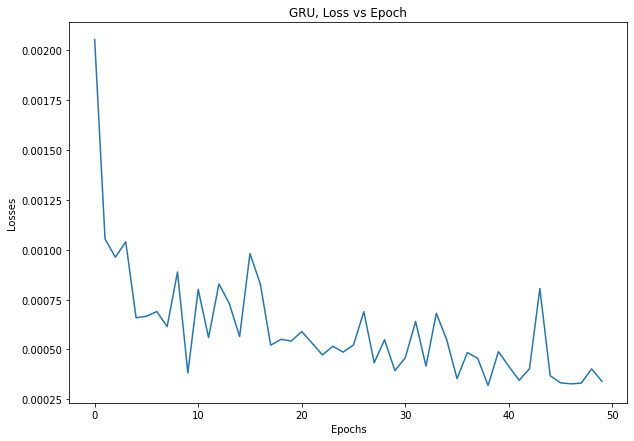

In [106]:
plt.figure(figsize =(10,7));
plt.plot(historyGRU.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("GRU, Loss vs Epoch")
plt.show()

# Test Vizualisation and Results

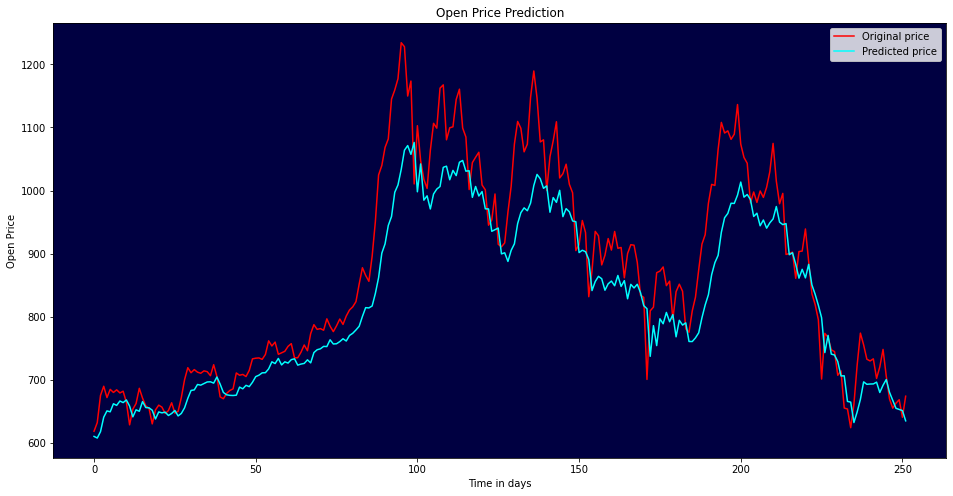

In [103]:
predictionsGRU = modelGRU.predict(X_test_Scaled)
predictionsGRU = sc.inverse_transform(predictionsGRU)
y_test_Unscaled = sc.inverse_transform(y_test_Scaled.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_Unscaled, color='red', label='Original price')
plt.plot(predictionsGRU, color='cyan', label='Predicted price')
plt.xlabel("Time in days")
plt.ylabel("Open Price")
plt.title("Open Price Prediction")
plt.legend()

In [104]:
resultsGRU = pd.DataFrame(y_test_Unscaled, columns = ['True'])
resultsGRU['Predictions'] = pd.DataFrame(predictionsGRU, columns = ['Prediction'])

resultsGRU.tail(5)

,True,Predictions
247,654.859985,667.245117
248,662.750000,654.601562
249,668.210022,652.882935
250,640.299988,650.982544
251,673.809998,634.731689


In [105]:
# Test MSE
evaluate(y_test_Unscaled,predictionsGRU)

4799.996403750245